## Insight for the medical dataset

### Imports

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import collections
%matplotlib inline

### Paths

In [3]:
DATA_PATH = './data/medical/'
BINDINGDB = 'BindingDB_All.tsv'
ChEMBL = 'BindingDB_ChEMBL.tsv'

### Loading the data

In [4]:
def load_BindingDB(file):
    file_path = DATA_PATH + file

    ## load the first row to get the number of columns
    df_first_row = pd.read_csv(file_path, sep='\t', nrows=1)

    ## number of columns to use
    df = pd.read_csv(file_path, sep='\t', header=0, usecols=range(df_first_row.shape[1]))
    return df

In [5]:
df = load_BindingDB(BINDINGDB)

C:\Users\Charaf Kamel\AppData\Local\Temp\ipykernel_36340\2661906853.py:8: DtypeWarning: Columns (8,9,10,11,12,13,15,17,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,141,142,143,146,147,148,149,150,151,153,154,155,158,159,160,161,162,163,165,166,167,170,171,172,173,174,175,177,178,179,182,183,184,185,186,187,189,190,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', header=0, usecols=range(df_first_row.shape[1]))


In [6]:
print(f"Number of rows: {len(df)}")
print(f"Number of cols: {len(df.columns)}")

Number of rows: 2913285
Number of cols: 194


In [7]:
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
column_names = df.columns.tolist()

# Save to a text file
with open('column_names.txt', 'w') as f:
    for column in column_names:
        f.write(f"{column}\n")  # Write each column name on a new line

In [9]:
import re
def keep_just_numeric(value):
    if type(value) != str:
        return -1
    
    cleaned_val = re.sub(r'[^\d.]+','', str(value)) ## There are random float / str in the dataset?? -> convert to str
    if(cleaned_val == ''): #It didn't contain any number?
        return -1
    return float(cleaned_val)

affinity_cols = ["Ki (nM)", "Kd (nM)"] ## Measures of binding affinity
ec_ic = ["EC50 (nM)", "IC50 (nM)"] #### Measures of inhibitory (IC50) and effective concentrations (EC50)
bind_unbind = ["kon (M-1-s-1)", "koff (s-1)"] ## Rates of binding / unbinding of ligands

binding_ligand_efficency_cols = affinity_cols + ec_ic + bind_unbind
filtered_df = df.copy()

for af_col in binding_ligand_efficency_cols:
    filtered_df[af_col] = filtered_df[af_col].apply(keep_just_numeric)
filtered_df.head()
    

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.80,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bar plots

#### NaN check by column

In [ ]:
nan_counts_per_col = df.isna().mean(axis=0)*100
nan_counts_per_col.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Histogram of NaN percentages for columns")

In [12]:
new_df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
new_df = df.copy()
cols_to_drop = np.where(nan_counts_per_col >= 80)
new_df.drop(cols_to_drop[0])
new_df.head()


KeyboardInterrupt



In [ ]:
## WE have values in them like >1 or <21

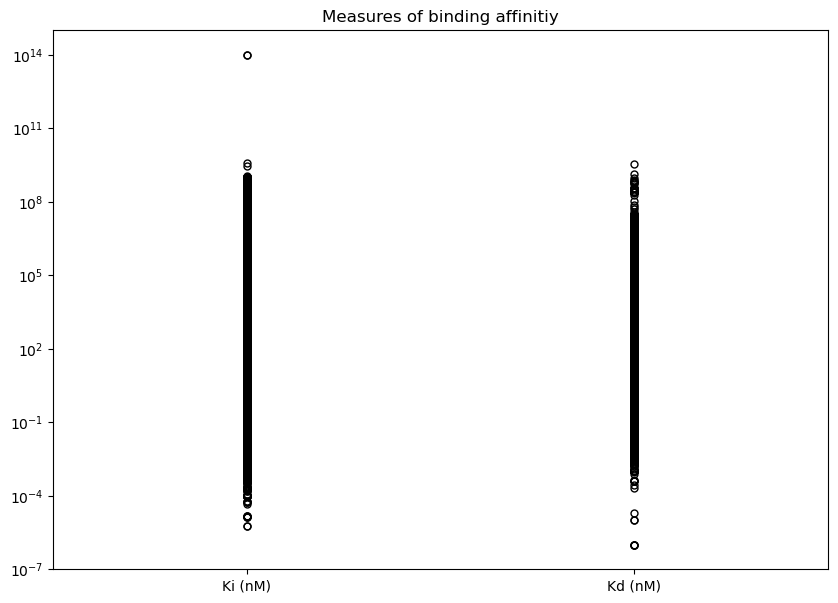

In [ ]:
filtered_df_aff = filtered_df[affinity_cols]
fig = plt.figure(figsize =(10, 7))
flierprops = dict(marker='o', color='red', markersize=5)
meanprops = dict(marker='o', color='orange', markersize=12, markeredgecolor='orange', markeredgewidth=10)  # Customize mean appearance

for i, af_col in enumerate(affinity_cols):
    plt.boxplot(filtered_df_aff[af_col], positions=[i], widths=0.5, flierprops=flierprops, meanprops=meanprops)
plt.title("Measures of binding affinitiy")
plt.xticks(range(len(affinity_cols)), affinity_cols)
#plt.ylim([-0.3, 1000])
plt.yscale('log')
plt.show()



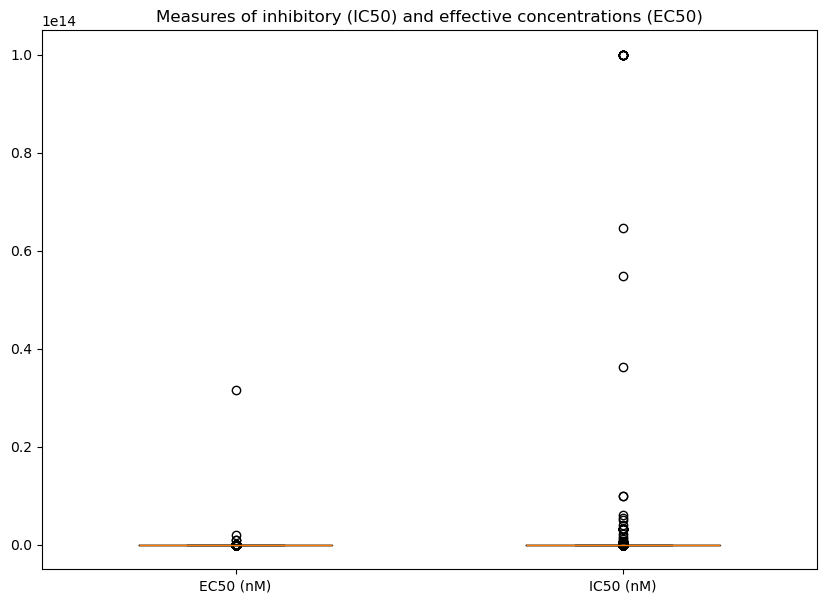

In [ ]:
filtered_df_ec_ic = filtered_df[ec_ic]
fig = plt.figure(figsize =(10, 7))
flierprops = dict(marker='o', color='red', markersize=5)
meanprops = dict(marker='o', color='orange', markersize=8) 

for i, af_col in enumerate(ec_ic):
    plt.boxplot(filtered_df_ec_ic[af_col], positions=[i], widths=0.5)
plt.title("Measures of inhibitory (IC50) and effective concentrations (EC50)")
plt.xticks(range(len(ec_ic)), ec_ic)
#plt.yticks(np.arange(-100, 100, step=10))
#plt.yscale('log')
plt.show()



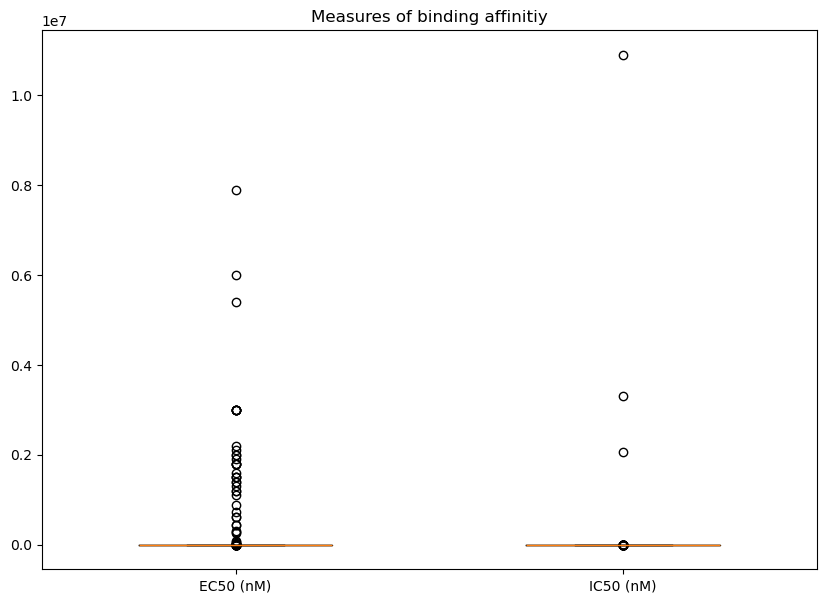

In [ ]:
filtered_df_bind_unbind = filtered_df[bind_unbind]
fig = plt.figure(figsize =(10, 7))
flierprops = dict(marker='o', color='red', markersize=5)
meanprops = dict(marker='o', color='orange', markersize=8) 

for i, af_col in enumerate(bind_unbind):
    plt.boxplot(filtered_df_bind_unbind[af_col], positions=[i], widths=0.5)
plt.title("Measures of binding affinitiy")
plt.xticks(range(len(ec_ic)), ec_ic)
#plt.yticks(np.arange(-100, 100, step=10))
#plt.yscale('log')
plt.show()



#### Temp distribution

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

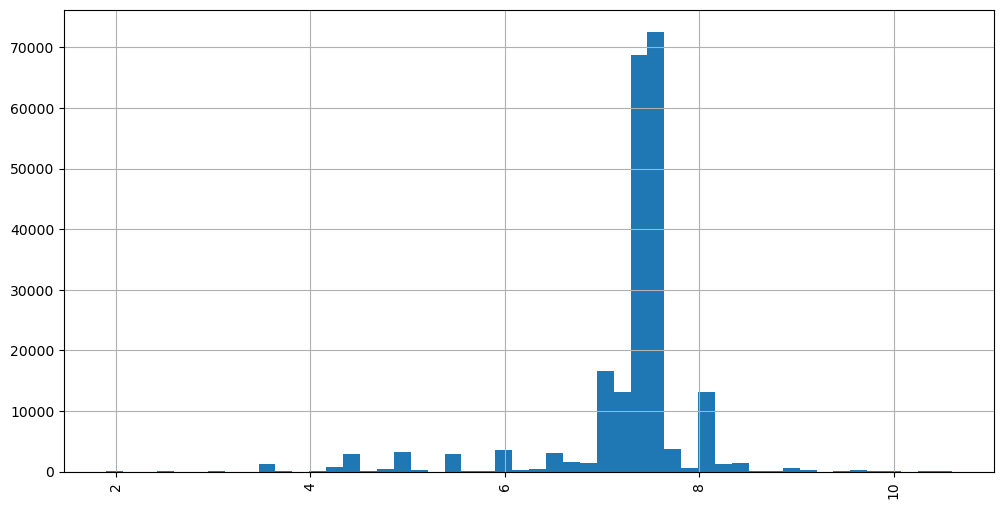

In [ ]:
plt.figure(figsize=(12, 6)) 
df['pH'].hist(bins = 50)
plt.xticks(rotation=90)

In [ ]:
type(list(df['Temp (C)'])[10000])

a = [b for b in a if isinstance(b, float)]

float

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, '37.00 C'),
  Text(1, 0, '25.00 C'),
  Text(2, 0, '30.00 C'),
  Text(3, 0, '22.00 C'),
  Text(4, 0, '4.00 C'),
  Text(5, 0, '28.00 C'),
  Text(6, 0, '23.00 C'),
  Text(7, 0, '20.00 C'),
  Text(8, 0, '21.00 C'),
  Text(9, 0, '35.00 C'),
  Text(10, 0, '38.00 C'),
  Text(11, 0, '27.00 C'),
  Text(12, 0, '24.00 C'),
  Text(13, 0, '40.00 C'),
  Text(14, 0, '32.00 C'),
  Text(15, 0, '0.00 C'),
  Text(16, 0, '55.00 C'),
  Text(17, 0, '26.00 C'),
  Text(18, 0, '36.00 C'),
  Text(19, 0, '22.50 C'),
  Text(20, 0, '15.00 C'),
  Text(21, 0, '34.00 C'),
  Text(22, 0, '10.00 C'),
  Text(23, 0, '16.00 C'),
  Text(24, 0, '7.70 C'),
  Text(25, 0, '2.70 C'),

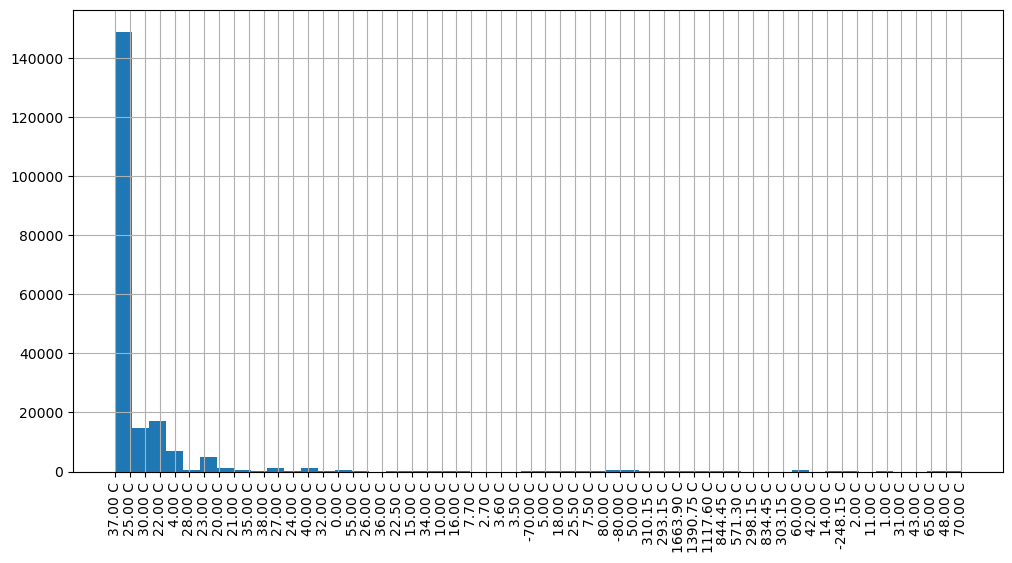

In [ ]:
plt.figure(figsize=(12, 6)) 
df['Temp (C)'].hist(bins = 50)
plt.xticks(rotation=90)

### Next

#### Find all cancer related row

In [ ]:
filtered_df.head()

In [16]:
cancer_keywords = [
    "cancer", "tumor", "carcinoma", "neoplasm", "malignancy", "metastasis", "oncology",
    "sarcoma", "adenocarcinoma", "lymphoma", "leukemia", "myeloma", "breast cancer",
    "lung cancer", "prostate cancer", "colon cancer", "rectal cancer", "colorectal cancer",
    "skin cancer", "melanoma", "bladder cancer", "kidney cancer", "renal cancer",
    "pancreatic cancer", "ovarian cancer", "cervical cancer", "uterine cancer", "thyroid cancer",
    "liver cancer", "gastric cancer", "stomach cancer", "esophageal cancer", "brain cancer",
    "glioma", "astrocytoma", "neuroblastoma", "endometrial cancer", "dysplasia", "hyperplasia",
    "leukoplakia", "adenoma", "lesion", "metastases", "carcinoma in situ", "anaplastic",
    "fibrosarcoma", "osteosarcoma", "mesothelioma", "chemotherapy", "radiotherapy",
    "immunotherapy", "biopsy", "staging", "grading", "metastasize", "malignant", "benign",
    "tumor suppressor", "oncogene", "palliative care", "remission", "recurrence"
]
filtered_df_with_target_name = filtered_df[filtered_df["Target Name"].apply(lambda x: any(keyword in str(x).lower() for keyword in cancer_keywords))]

In [17]:
print(f"There are in total {len(filtered_df_with_target_name)} cancer related record out of {len(df)}, which is {len(filtered_df_with_target_name)*100/len(df):.3}%")

There are in total 67002 cancer related record out of 2913285, which is 2.3%


In [18]:
len(filtered_df_with_target_name["Target Name"].unique())

123

#### We want human as source organism -- just 3 records, so we allow NaN -> How to handle them?

In [19]:
filtered_df_human = filtered_df_with_target_name[filtered_df_with_target_name["Target Source Organism According to Curator or DataSource"].apply(lambda x: "human" in str(x).lower() or type(x) == float)]

In [20]:
print(f"There are in total {len(filtered_df_human)} hopefully human-cancer related record out of {len(filtered_df_with_target_name)}")

There are in total 40283 hopefully human-cancer related record out of 67002


In [ ]:
filtered_df_human.head()

In [ ]:
mutant_keywords = [
    "mutation",
    "oncogenesis", "tumorigenesis", "apoptosis", "angiogenesis", "HER2", "BRAF", "KRAS", "EGFR",
    "BRCA1", "BRCA2", "P53", "MDM2", "CDK4", "CDK6", "V600", "G12"
]
only_mutants_df = filtered_df_human[filtered_df_human["Target Name"].apply(lambda x: any(keyword in str(x).lower() for keyword in mutant_keywords))]

In [ ]:
only_mutants_df["Target Name"].unique()

array(['Apoptosis regulator Bcl-2', 'Apoptosis regulator Bcl-2 [1-204]',
       'Apoptosis regulator Bcl-2/Glutathione S-transferase P',
       'PRKC apoptosis WT1 regulator protein',
       'Apoptosis regulator Bcl-2 [1-211]',
       'Apoptosis regulator Bcl-2/Bcl2-associated agonist of cell death [103-127,M117N]',
       'Apoptosis regulator Bcl-2 [G101V]',
       'Apoptosis regulator Bcl-2 [1-211]/Bad BH3 Peptide',
       'Apoptosis regulator BAX'], dtype=object)

Bcl-2 protein regulates cell death and it is implicated in many cancers.\\
Why Bcl-2 is targeted: Bcl-2 is overexpressed in many cancers, especially blood cancers like leukemia and lymphoma. It blocks apoptosis, meaning it helps cancer cells survive when they should normally die.
How targeting Bcl-2 helps: Drugs that inhibit Bcl-2 (like Venetoclax, a Bcl-2 inhibitor) remove the “survival signal” from cancer cells, making them more susceptible to apoptosis. By blocking Bcl-2, these drugs essentially “unblock” the cell death pathway, allowing chemotherapy or the body’s immune system to kill off the cancer cells more effectively.
Ligands’ role: Ligands or small molecules that bind to Bcl-2 can inhibit its function, freeing up pro-apoptotic proteins like BAX to induce cell death. In essence, Bcl-2 inhibitors help restore the natural process of apoptosis in cancer cells.

Why PRKC-WT1 is targeted: The PRKC-WT1 pathway is involved in signaling processes that control cell growth, survival, and apoptosis. In some cancers, this pathway supports cancer cell survival or growth.
How targeting PRKC-WT1 helps: By disrupting PRKC signaling, treatments can make cancer cells more vulnerable to cell death. For example, if PRKC signals support survival, inhibiting this pathway can help reduce tumor growth or increase the effectiveness of other cancer treatments.
Ligands’ role: Ligands that bind to components of the PRKC pathway can modify how it signals in cells. If a ligand can inhibit PRKC function, it might reduce cancer cell proliferation and sensitize cancer cells to apoptosis.

Targeting BAX or Enhancing its Function: Promoting Apoptosis Directly
Why BAX is targeted: BAX is a pro-apoptotic protein that directly promotes cell death. In many cancers, BAX activity is low, mutated, or outcompeted by anti-apoptotic proteins like Bcl-2.
How targeting BAX helps: By directly activating or mimicking BAX, treatments can force cancer cells to undergo apoptosis. Cancer therapies that enhance BAX activity could directly drive cancer cells to die, making it a valuable target.
Ligands’ role: Ligands that activate BAX or mimic its action can trigger apoptosis more directly. In other words, instead of just removing Bcl-2’s suppression, these ligands might act as a “shortcut” to apoptosis by initiating the process independently.

#### **Let's focus on Bcl-2 family, because we have 2 mutants**

##### Check how ligand efficency changes between "original" Apoptosis regulator Bcl-2 and it's mutants:
- Apoptosis regulator Bcl-2/Bcl2-associated agonist of cell death [103-127,M117N]
- Apoptosis regulator Bcl-2 [G101V]
- We can also check the difference in ligand binding strength also in engineered fusion: *Apoptosis regulator Bcl-2/Glutathione S-transferase P*

Others are not mutant, just a truncated version of the original one

In [ ]:
base_df = only_mutants_df.copy()

In [ ]:
base_df.head()

In [ ]:
base_df["Target Name"].unique()

array(['Apoptosis regulator Bcl-2', 'Apoptosis regulator Bcl-2 [1-204]',
       'Apoptosis regulator Bcl-2/Glutathione S-transferase P',
       'PRKC apoptosis WT1 regulator protein',
       'Apoptosis regulator Bcl-2 [1-211]',
       'Apoptosis regulator Bcl-2/Bcl2-associated agonist of cell death [103-127,M117N]',
       'Apoptosis regulator Bcl-2 [G101V]',
       'Apoptosis regulator Bcl-2 [1-211]/Bad BH3 Peptide',
       'Apoptosis regulator BAX'], dtype=object)

In [ ]:
"""
"UniProt (SwissProt) Primary ID of Target Chain, UniProt (SwissProt) Entry Name of Target Chain"
P10415: BCL2_HUMAN
P10417: BCL2_MOUSE -> interesting
Q96IZ0: PAWR_HUMAN
Q07812: BAX_HUMAN
"""

In [ ]:
UniProt_df = base_df.filter(like='UniProt', axis=1)


**Question 1/a: How many different ligands do we have for the "original" and for the mutant ones?**

In [ ]:
unique_ligands_for_original_Bcl2_2 = base_df[base_df["Target Name"] == "Apoptosis regulator Bcl-2"]["Ligand SMILES"].unique()
mutant_M117N = base_df[base_df["Target Name"] == "Apoptosis regulator Bcl-2/Bcl2-associated agonist of cell death [103-127,M117N]"]["Ligand SMILES"].unique()
mutant_G101V = base_df[base_df["Target Name"] == "Apoptosis regulator Bcl-2 [G101V]"]["Ligand SMILES"].unique()


print(f"We have {len(unique_ligands_for_original_Bcl2_2)} different ligands for the original")
print(f"We have {len(mutant_M117N)} different ligands for the M117N")
print(f"We have {len(mutant_G101V)} different ligands for the G101V")

We have 4225 different ligands for the original
We have 97 different ligands for the M117N
We have 24 different ligands for the G101V


**Question 2/a: Are there any ligands that are the same and used for original and mutants?**

In [ ]:
common_with_M117N = np.intersect1d(unique_ligands_for_original_Bcl2_2, mutant_M117N)
print(f"There are {len(common_with_M117N)} common element with mutant_M117N")

There are 0 common element with mutant_M117N


In [ ]:
common_with_G101V = np.intersect1d(unique_ligands_for_original_Bcl2_2, mutant_G101V)
print(f"There are {len(common_with_G101V)} common element with mutant_G101V")

There are 24 common element with mutant_G101V


##### So with M117N we don't have the same ligands => Check only with G101V, because there all of the ligands match with the original

**Question 2/b: If so what are the difference in regards of the ligand measurements / experimental conditions**

In [ ]:
## Check original:

In [ ]:
original_df = base_df[(base_df["Target Name"] == "Apoptosis regulator Bcl-2") & (base_df["Ligand SMILES"].apply(lambda x: x in mutant_G101V))][["Ligand SMILES"] + binding_ligand_efficency_cols]

In [ ]:
original_df.describe()

,Ki (nM),Kd (nM),EC50 (nM),IC50 (nM),kon (M-1-s-1),koff (s-1)
count,68.000000,68.000000,68.000000,68.000000,68.0,68.0
mean,0.386882,9.442647,-0.941176,12.170618,-1.0,-1.0
std,7.547129,85.609098,0.485071,38.479332,0.0,0.0
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
50%,-1.000000,-1.000000,-1.000000,0.034000,-1.0,-1.0
75%,-1.000000,-1.000000,-1.000000,0.094000,-1.0,-1.0
max,59.000000,705.000000,3.000000,230.000000,-1.0,-1.0


In [ ]:
G101V_df = base_df[(base_df["Target Name"] == "Apoptosis regulator Bcl-2 [G101V]")][["Ligand SMILES"] + binding_ligand_efficency_cols]

##### So we have 24 unique ligands that occur in the G101V and there are 25 records (1 ligand occured twice), which one?

In [ ]:
G101V_df.groupby("Ligand SMILES").filter(lambda x: len(x) >= 2)

,Ligand SMILES,Ki (nM),Kd (nM),EC50 (nM),IC50 (nM),kon (M-1-s-1),koff (s-1)
1169414,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,-1.0,-1.0,-1.0,28.0,-1.0,-1.0
1169421,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,-1.0,-1.0,-1.0,1.2,-1.0,-1.0


##### For each ligand in both normal / mutant check the ligands attributes:

In [ ]:
def get_affinity_measurement_statistical_values(df):
    print(df.describe().loc[["count", "mean", "std", "min", "max"]],end="\n\n")

In [ ]:
2

2

In [ ]:
for smile in common_with_G101V:
    filtered_or_df = original_df[original_df["Ligand SMILES"] == smile]
    filtered_g101v_df = G101V_df[G101V_df["Ligand SMILES"] == smile]
    print("SMILE: " + smile, end="\n\n")

    print("Original", end="\n")
    get_affinity_measurement_statistical_values(filtered_or_df)

    print("G101V", end="\n")
    get_affinity_measurement_statistical_values(filtered_g101v_df)
    print("\n\n ------------\n\n")

SMILE: CC(C)N1CCN(C2CC3(C2)CCN(CC3)c2ccc(C(=O)NS(=O)(=O)c3ccc(NCC4CCOCC4)c(c3)[N+]([O-])=O)c(Oc3cnc4[nH]ccc4c3)c2)C(C1)c1ccccc1C1CC1

Original
       Ki (nM)  Kd (nM)  EC50 (nM)  IC50 (nM)  kon (M-1-s-1)  koff (s-1)
count      2.0      2.0        2.0      2.000            2.0         2.0
mean      -1.0     -1.0       -1.0      0.025           -1.0        -1.0
std        0.0      0.0        0.0      0.000            0.0         0.0
min       -1.0     -1.0       -1.0      0.025           -1.0        -1.0
max       -1.0     -1.0       -1.0      0.025           -1.0        -1.0

G101V
       Ki (nM)  Kd (nM)  EC50 (nM)  IC50 (nM)  kon (M-1-s-1)  koff (s-1)
count      1.0      1.0        1.0       1.00            1.0         1.0
mean      -1.0     -1.0       -1.0       0.86           -1.0        -1.0
std        NaN      NaN        NaN        NaN            NaN         NaN
min       -1.0     -1.0       -1.0       0.86           -1.0        -1.0
max       -1.0     -1.0       -1.0       0.86  